<a href="https://colab.research.google.com/github/amanbhardwaj12072003/Test/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df = df.set_index('timestamp').resample("H").mean()

In [ ]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [ ]:
fig = px.line(df.reset_index(),x='timestamp',y='value',title='New York Taxi Demand')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
                        dict(count = 1,label = "1y",step = "year",stepmode = "backward" ),
                        dict(count = 3,label = "3y",step = "year",stepmode = "backward" ),
                        dict(count = 5,label = "5y",step = "year",stepmode = "backward" ),
                        dict(step = "all")
        ])
    )
)
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
taxi_df = df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'},axis = 'columns')

In [ ]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train = taxi_df[(taxi_df['ds']>='2014-07-01') & (taxi_df['ds']<='2015-01-27')]
test = taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [ ]:
train.shape

(5041, 2)

In [ ]:
test.shape

(119, 2)

In [ ]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m = Prophet(changepoint_range=0.95)

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)

,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23778.529213,19296.403726,28773.252526
5156,2015-01-31 20:00:00,24342.584334,19727.333233,29183.306388
5157,2015-01-31 21:00:00,23219.297735,18306.740684,27809.048563
5158,2015-01-31 22:00:00,21027.355314,16247.793900,25895.551199
5159,2015-01-31 23:00:00,18500.216845,13730.865046,23345.598623


In [ ]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

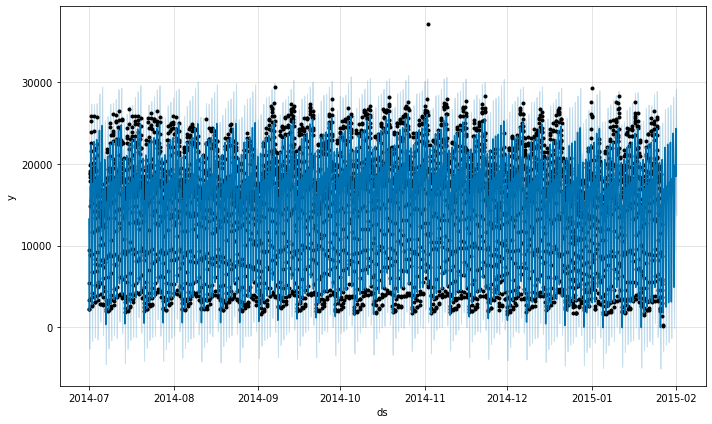

In [ ]:
fig1 = m.plot(forecast)

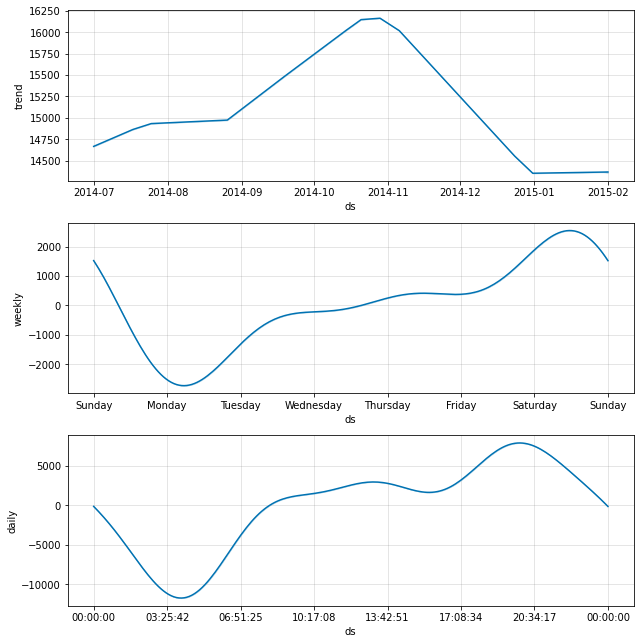

In [ ]:
comp = m.plot_components(forecast)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8469.033306,17918.341903
2014-07-01 01:00:00,5433.0,10232.486172,5613.812682,14921.794648
2014-07-01 02:00:00,3346.5,6669.099458,1741.897939,11403.276970
2014-07-01 03:00:00,2216.5,3448.054270,-1243.896560,8394.023115
2014-07-01 04:00:00,2189.5,2017.409931,-2655.530350,6911.134484
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,19296.403726,28773.252526
2015-01-31 20:00:00,24138.0,24342.584334,19727.333233,29183.306388
2015-01-31 21:00:00,24194.5,23219.297735,18306.740684,27809.048563


In [ ]:
# Adding the error column in the data
results['error'] = results['y'] - results['yhat'] 

In [ ]:
# Adding the uncertainty cloumn in the data
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8469.033306,17918.341903,-3755.232792,9449.308597
2014-07-01 01:00:00,5433.0,10232.486172,5613.812682,14921.794648,-4799.486172,9307.981966
2014-07-01 02:00:00,3346.5,6669.099458,1741.897939,11403.276970,-3322.599458,9661.379031
2014-07-01 03:00:00,2216.5,3448.054270,-1243.896560,8394.023115,-1231.554270,9637.919675
2014-07-01 04:00:00,2189.5,2017.409931,-2655.530350,6911.134484,172.090069,9566.664834
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,19296.403726,28773.252526,4509.970787,9476.848800
2015-01-31 20:00:00,24138.0,24342.584334,19727.333233,29183.306388,-204.584334,9455.973156
2015-01-31 21:00:00,24194.5,23219.297735,18306.740684,27809.048563,975.202265,9502.307879


In [ ]:
results[results['error'].abs() > (1.5)*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-11-02 01:00:00,37204.5,14218.892870,9000.968122,19037.811105,22985.607130,10036.842983,yes
2015-01-01 01:00:00,29292.0,11405.545567,6954.263262,16179.779844,17886.454433,9225.516581,yes
2015-01-01 02:00:00,25753.5,7770.054639,3043.873750,12356.147216,17983.445361,9312.273466,yes
2015-01-01 03:00:00,22067.0,4478.895177,-188.956889,9471.958910,17588.104823,9660.915799,yes
2015-01-26 19:00:00,4565.5,19771.308307,15058.791397,24466.249822,-15205.808307,9407.458425,yes
2015-01-26 20:00:00,3630.5,20546.581743,15872.059956,25064.194864,-16916.081743,9192.134908,yes
2015-01-26 21:00:00,2907.0,19647.710004,14888.677863,24134.299957,-16740.710004,9245.622094,yes
2015-01-26 22:00:00,1324.5,17691.969234,12979.512535,22342.243399,-16367.469234,9362.730865,yes
2015-01-26 23:00:00,243.0,15411.348672,10613.937849,20019.088823,-15168.348672,9405.150974,yes


In [ ]:
results['anomaly'] = results.apply(lambda x:'yes' if(np.abs(x['error'])>(1.5)*x['uncertainty']) else 'No' , axis=1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8469.033306,17918.341903,-3755.232792,9449.308597,No
2014-07-01 01:00:00,5433.0,10232.486172,5613.812682,14921.794648,-4799.486172,9307.981966,No
2014-07-01 02:00:00,3346.5,6669.099458,1741.897939,11403.276970,-3322.599458,9661.379031,No
2014-07-01 03:00:00,2216.5,3448.054270,-1243.896560,8394.023115,-1231.554270,9637.919675,No
2014-07-01 04:00:00,2189.5,2017.409931,-2655.530350,6911.134484,172.090069,9566.664834,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,19296.403726,28773.252526,4509.970787,9476.848800,No
2015-01-31 20:00:00,24138.0,24342.584334,19727.333233,29183.306388,-204.584334,9455.973156,No
2015-01-31 21:00:00,24194.5,23219.297735,18306.740684,27809.048563,975.202265,9502.307879,No


In [ ]:
fig = px.scatter(results.reset_index(),x='ds',y='y',color='anomaly',title='NewYork Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1,label="1y",step="year",stepmode="backward"),
                      dict(count=2,label="2y",step="year",stepmode="backward"),
                      dict(count=3,label="3y",step="year",stepmode="backward"),
                      dict(step="all")
        ])
    )
)
fig.show()

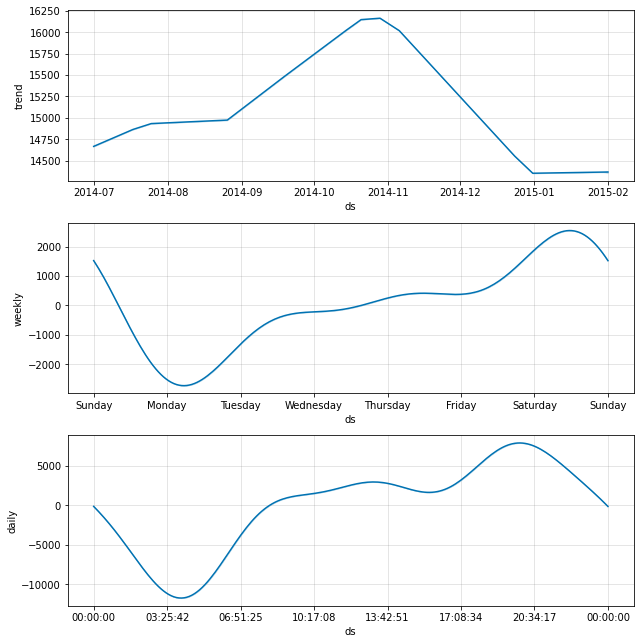

In [ ]:
comp = m.plot_components(forecast)